## **SavedFeaturesSelectedBackwardAuto_CC or SavedFeaturesSelectedBackward20to2_CC**

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import combinations
import scipy.stats as scs
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import warnings
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 

#list_of_selfeatures=np.load('SavedFeaturesSelectedBackwardAuto_CC'+str(CC)+'_'+dti_metric+'.npy',allow_pickle=True)
dti_metric='FA'
CC=5
nFeatures=5
RandomState=0

if nFeatures=='auto':
    list_of_selfeatures=np.load('SavedFeaturesSelectedBackwardAuto_CC'+str(CC)+'_'+dti_metric+'.npy',allow_pickle=True)
else:
    list_of_selfeatures=np.load('SavedFeaturesSelectedBackward20to2_CC'+str(CC)+'_'+dti_metric+'.npy',allow_pickle=True)
    list_of_selfeatures=list_of_selfeatures[nFeatures]


list_of_selfeatures

Index(['5', '54', '56', '68', '69'], dtype='object')

## **KMEANS USING SavedFeaturesSelectedBackwardAuto_CC**

In [2]:
 

warnings.filterwarnings('ignore')
nclust=2
dti_metric='FA'



SubjectTable= pd.read_csv('Subject_preproc.csv', sep=",")

dataRaw = pd.read_csv('CC_'+str(CC) +'_'+dti_metric+'.csv', sep=",")

SelectedFeat=(list_of_selfeatures)
print(SelectedFeat)

## create 2 groups of JND below and above median of JND q=2

labels = [0,1]
SubjectTable['JND_group'] = pd.qcut(SubjectTable['JND_P'], q=2, labels=labels)

SubjectTable.head()



Index(['5', '54', '56', '68', '69'], dtype='object')


,age,JND_P,IHD,FA_body,MD_body,AD_body,RD_body,group_O,group_Y,group,sex,JND_group
0,25.0,9.56,0.534027,0.583124,0.000678,0.001200,0.000417,0.0,1.0,Y,F,1
1,27.0,6.69,0.570600,0.613808,0.000638,0.001163,0.000375,0.0,1.0,Y,M,0
2,28.0,12.92,-0.140120,0.627866,0.000631,0.001173,0.000361,0.0,1.0,Y,F,1
3,21.0,1.95,0.488581,0.596784,0.000665,0.001187,0.000404,0.0,1.0,Y,F,0
4,25.0,2.54,0.578001,0.637038,0.000636,0.001197,0.000356,0.0,1.0,Y,F,0


In [3]:
data=pd.concat([dataRaw.loc[:,SelectedFeat], SubjectTable], axis=1)
data.head()
data.columns


Index(['5', '54', '56', '68', '69', 'age', 'JND_P', 'IHD', 'FA_body',
       'MD_body', 'AD_body', 'RD_body', 'group_O', 'group_Y', 'group', 'sex',
       'JND_group'],
      dtype='object')

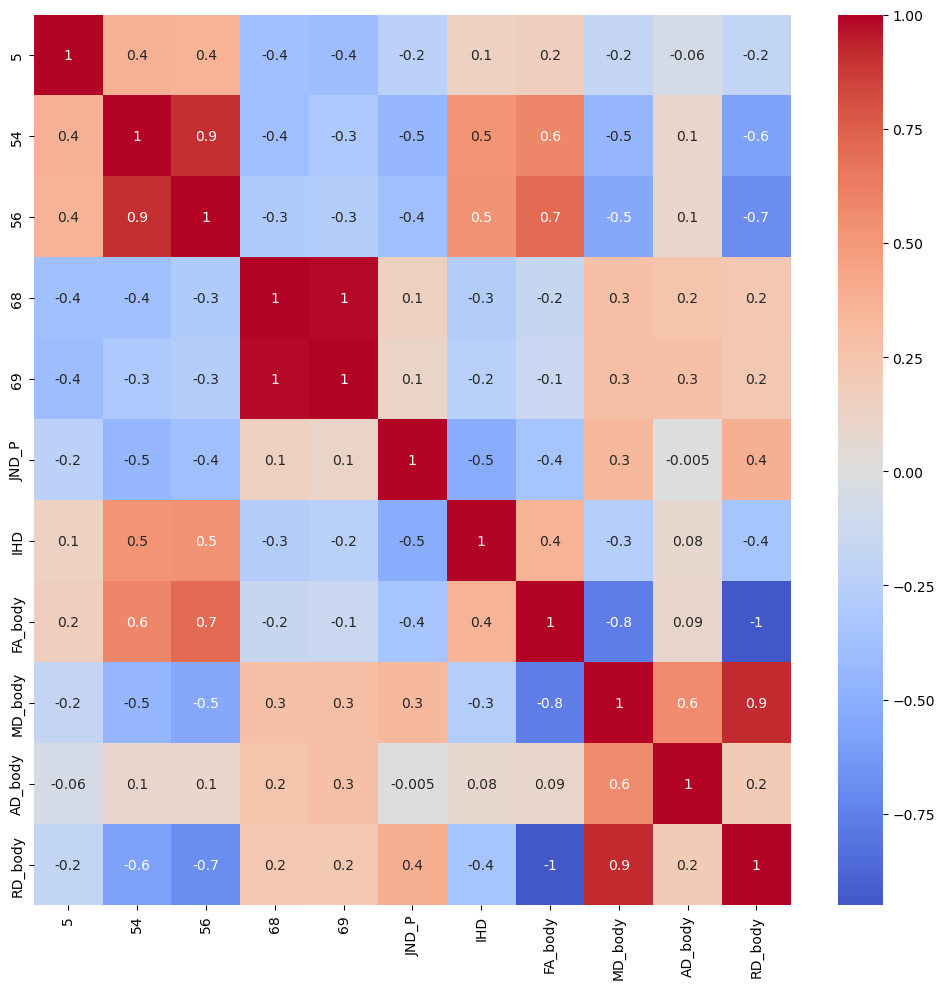

In [4]:
dataCorrmat=data.drop(['sex','age','group_Y', 'group_O', 'JND_group', 'group'], axis=1)

cont=dataCorrmat.columns
corr_matrix=pd.DataFrame(dataCorrmat[cont],columns=cont).corr()

fig, axes = plt.subplots(1, 1, figsize=(10,10))#, sharey=True)

sns.heatmap(corr_matrix,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g')
plt.tight_layout()



TypeError: unhashable type: 'list'

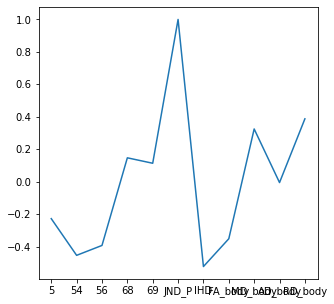

In [7]:

fig, axes = plt.subplots(1, 1, figsize=(5,5))#, sharey=True)

plt.plot(corr_matrix["JND_P"])
axes.spines[['right', 'top']].set_visible(False)
axes.set_xlabel('Features')
axes.set_ylabel('Corr.Coeff.')

plt.tight_layout()


In [8]:
dataKmeans=data.drop(['sex','age','group_Y', 'group_O', 'JND_group', 'group','FA_body','MD_body','AD_body','RD_body','JND_P','IHD'], axis=1)
#dataKmeans=data.drop(['sex','age','group_Y', 'group_O', 'JND_group', 'group','JND_P','IHD'], axis=1)
#dataKmeans=dataKmeans.drop(list_of_selfeatures, axis=1)


X=dataKmeans
dataKmeans.head()
data.columns
print(list_of_selfeatures)


#SCALING using a StandardScaler

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)
Xscaled = pd.DataFrame(Xscaled, columns=X.columns)

Xscaled.head()

Index(['5', '54', '56', '68', '69'], dtype='object')


,5,54,56,68,69
0,-0.904337,0.834965,0.746252,-1.034831,-0.830778
1,1.903469,0.183068,-0.782040,-1.191149,-1.141964
2,0.569925,0.892579,0.763454,-0.601186,-0.323947
3,2.779154,-0.346131,-0.050556,-0.571475,-0.754571
4,-0.010887,1.339487,1.476908,-0.314883,-0.279858


TypeError: unhashable type: 'list'

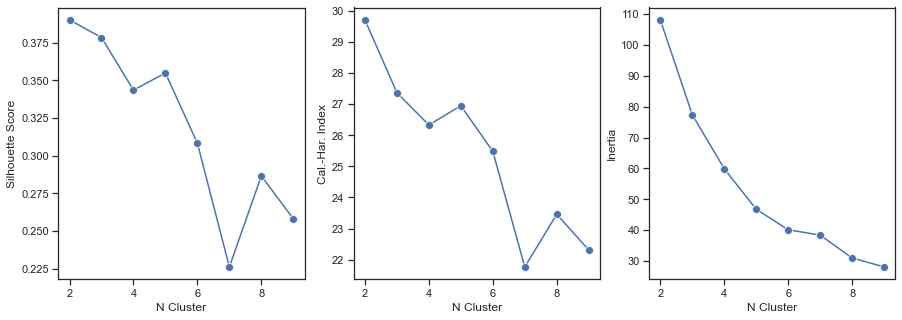

In [9]:
## n cluster validity test
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_samples, silhouette_score

SilScore=[]
CalHar=[]
DavBouldin=[]
inertia=[]

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=RandomState).fit(Xscaled)
    SilScore.append(silhouette_score(Xscaled, kmeans.fit_predict(Xscaled)))
    CalHar.append(calinski_harabasz_score(Xscaled, kmeans.labels_))
    # DavBouldin.append(davies_bouldin_score(X, labels))
    inertia.append(kmeans.inertia_)  # Inertie (cohésion)

#AllSilScore.append(SilScore)
#AllCalHar.append(CalHar)
#Allinertia.append(inertia)

K_range = range(2, 10)  
    
df = pd.DataFrame({'Silhouette Score': SilScore,'Inertia': inertia,
               'Cal.-Har. Index': CalHar,'N Cluster': K_range})
df.head
sns.set_theme(style="ticks")



fig, axes = plt.subplots(1, 3, figsize=(15, 5))#, sharey=True)

sns.lineplot(ax=axes[0],data=df, y='Silhouette Score', x='N Cluster', marker='o',markersize=8)
sns.lineplot(ax=axes[1],data=df, x='N Cluster', y='Cal.-Har. Index', marker='o',markersize=8)
sns.lineplot(ax=axes[2],data=df, x='N Cluster', y='Inertia', marker='o',markersize=8)
axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)
axes[2].spines[['right', 'top']].set_visible(False)
plt.tight_layout()


TypeError: unhashable type: 'list'

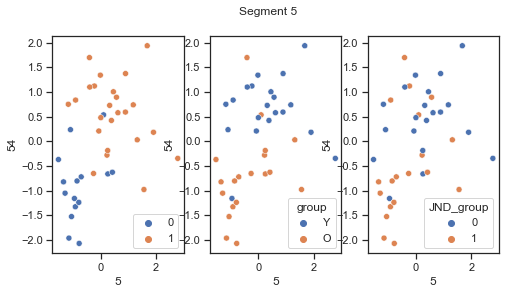

In [11]:

#KMEANS  
nclust=2
kmeans = KMeans(n_clusters=nclust, random_state=RandomState).fit(Xscaled)
kmeans.labels_
CenterCluster=kmeans.cluster_centers_
labels_CC = kmeans.labels_

data["cluster"]=labels_CC


#f1='FA_body'
#f2='RD_body'
if CC==5:
    f1='54'
    f2='56'
elif CC==4:
    f1='26'
    f2='27'

f1=list_of_selfeatures[0]
f2=list_of_selfeatures[1]




fig, axes = plt.subplots(1, 3, figsize=(8, 4))#, sharey=True)
fig.suptitle('Segment ' + str(CC)  , fontsize=12 )# or plt.suptitle('Main title')    
t=sns.scatterplot(ax=axes[1],data=Xscaled, x=f1, y=f2,hue=SubjectTable["group"]) 

sns.scatterplot(ax=axes[0],data=Xscaled, x=f1, y=f2,hue=labels_CC) 
sns.scatterplot(ax=axes[2],data=Xscaled, x=f1, y=f2,hue=SubjectTable["JND_group"]) 

axes[1].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)
axes[0].spines[['right', 'top']].set_visible(False)
axes[0].spines[['right', 'top']].set_visible(False)
axes[2].spines[['right', 'top']].set_visible(False)
axes[2].spines[['right', 'top']].set_visible(False)
plt.tight_layout()

fig, axes = plt.subplots(1, 2, figsize=(12, 3))#, sharey=True)

sns.scatterplot(ax=axes[0],data=Xscaled, x=SubjectTable["JND_P"], y=SubjectTable["IHD"],hue=labels_CC) 
axes[0].spines[['right', 'top']].set_visible(False)
axes[0].spines[['right', 'top']].set_visible(False)

sns.scatterplot(ax=axes[1],data=Xscaled, x=SubjectTable["JND_P"], y=SubjectTable["IHD"],hue=SubjectTable["group"]) 
axes[1].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)
plt.tight_layout()

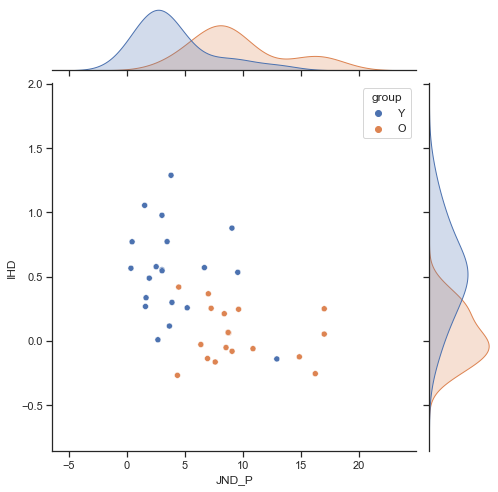

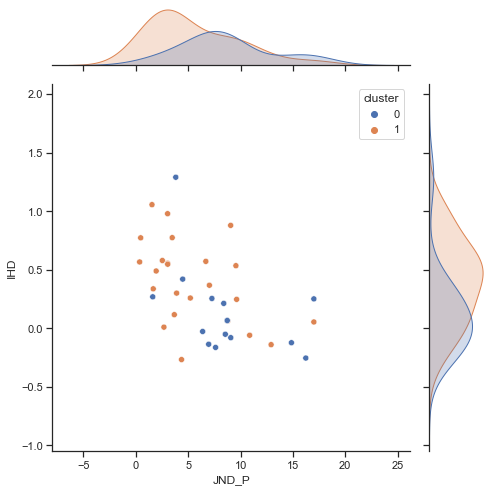

In [12]:
import seaborn as sns

sns.set_theme(style="ticks")

SubjectTable["group"]
data.head()

SubjectTable["cluster"]=labels_CC

#g = sns.jointplot(x="JND_P", y="IHD", data=SubjectTable, kind="kde",hue="group", truncate=False,color="m", height=7)
#g = sns.jointplot(x="JND_P", y="IHD", data=SubjectTable, kind="kde",hue="cluster", truncate=False,color="m", height=7)
g = sns.jointplot(x="JND_P", y="IHD", data=SubjectTable, hue="group", color="m", height=7)
g = sns.jointplot(x="JND_P", y="IHD", data=SubjectTable, hue="cluster",color="m", height=7)
plt.tight_layout()

### **X and y before classifications**

In [18]:
print(X.head())
print(Xscaled.head())

#X=dataKmeans
X=Xscaled

print(X.head())

targetVar=1

if targetVar==0:
    Y_group=data["group"] 
    targetnames=['Y','O']
    y=Y_group
if targetVar==1:
    Y_group=data["JND_group"] 
    targetnames=['0','1']   
    y=Y_group
if targetVar==2:
    Y_group=labels_CC
    targetnames=['0','1']   
    y=data["cluster"] 
    

          5        54        56        68        69
0 -0.904337  0.834965  0.746252 -1.034831 -0.830778
1  1.903469  0.183068 -0.782040 -1.191149 -1.141964
2  0.569925  0.892579  0.763454 -0.601186 -0.323947
3  2.779154 -0.346131 -0.050556 -0.571475 -0.754571
4 -0.010887  1.339487  1.476908 -0.314883 -0.279858
          5        54        56        68        69
0 -0.904337  0.834965  0.746252 -1.034831 -0.830778
1  1.903469  0.183068 -0.782040 -1.191149 -1.141964
2  0.569925  0.892579  0.763454 -0.601186 -0.323947
3  2.779154 -0.346131 -0.050556 -0.571475 -0.754571
4 -0.010887  1.339487  1.476908 -0.314883 -0.279858
          5        54        56        68        69
0 -0.904337  0.834965  0.746252 -1.034831 -0.830778
1  1.903469  0.183068 -0.782040 -1.191149 -1.141964
2  0.569925  0.892579  0.763454 -0.601186 -0.323947
3  2.779154 -0.346131 -0.050556 -0.571475 -0.754571
4 -0.010887  1.339487  1.476908 -0.314883 -0.279858


### **HalvingGridSearchCV and DECISION TREE ONE ITERATION**

Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 3, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



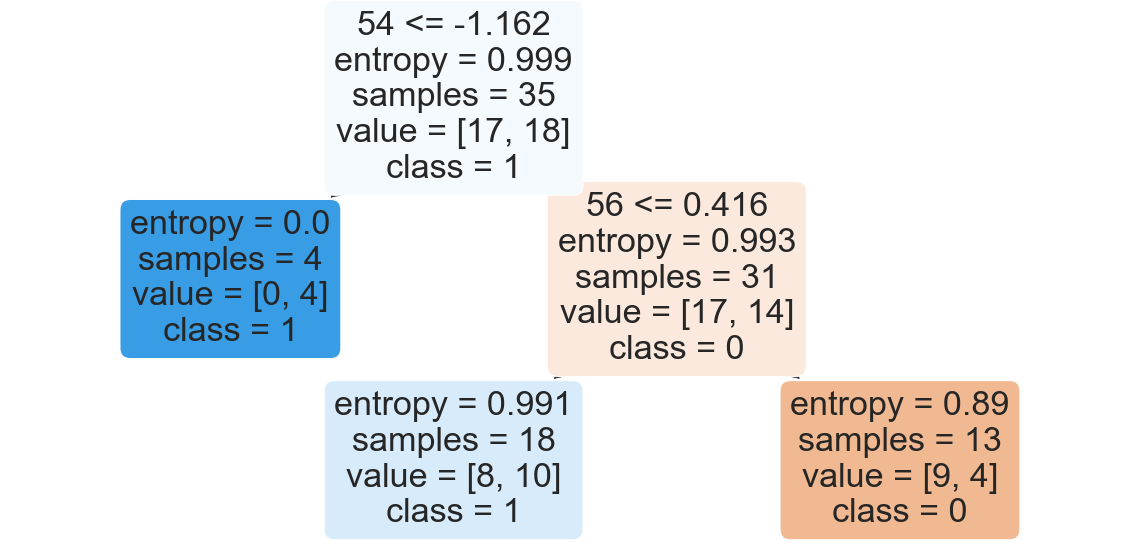

Confusion Matrix:
[[3 0]
 [0 1]]


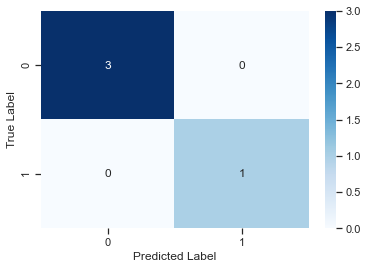

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Cross-Validation Accuracy Scores: [0.375      0.375      0.625      0.625      0.57142857]
Mean CV Accuracy: 0.5143


Text(0.5, 1.0, 'Learning Curve')

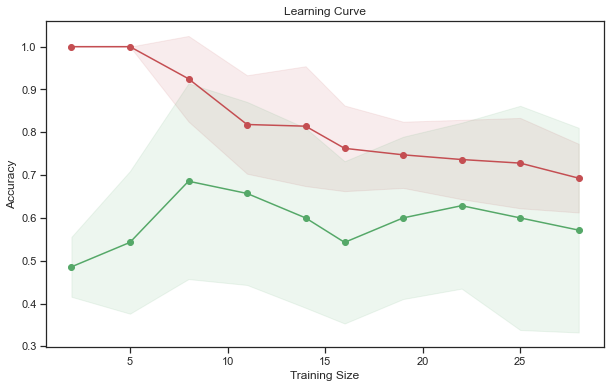

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, roc_auc_score)
from sklearn import tree
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RandomState)

param_grid = {'max_depth': [2,3,4 ,5, None],'splitter': ['best','random'],'criterion': ['gini', 'entropy'],"min_samples_split": [3,4,5]}

# Initialize the DecisionTreeClassifier and GridSearchCV
tree_clf = DecisionTreeClassifier(random_state=RandomState)

grid_search = HalvingGridSearchCV(tree_clf, param_grid,random_state=RandomState,factor=3, cv=5).fit(X_train, y_train)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best estimator on the test data
y_pred = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot the best decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_estimator, filled=True, feature_names=X.columns, class_names=targetnames, rounded=True)
plt.show()
best_estimator

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualizing the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_estimator, X, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

### **DECISION TREE LEARNING CURVE**



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the model
#clf = DecisionTreeClassifier(random_state=42)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')



### **HalvingGridSearchCV and DECISION TREE MANY ITERATION**

In [20]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, roc_auc_score)
from sklearn import tree
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

CVScore,AccuracyTree=[],[]

for randstate in range(10):
    

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=randstate)
    
    param_grid = {'max_depth': [2,3,4 ,5, None],'splitter': ['best','random'],'criterion': ['gini', 'entropy'],"min_samples_split": [3,4,5]}
    
    # Initialize the DecisionTreeClassifier and GridSearchCV
    tree_clf = DecisionTreeClassifier(random_state=randstate)
    
    grid_search = HalvingGridSearchCV(tree_clf, param_grid,random_state=randstate,factor=3, cv=5).fit(X_train, y_train)
    
    # Fit the GridSearchCV to the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and the best estimator
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    
    # Evaluate the best estimator on the test data
    y_pred = best_estimator.predict(X_test)
    
    # Plot the best decision tree


    
    cm = confusion_matrix(y_test, y_pred)
        
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(best_estimator, X, y, cv=5)

    
    
    CVScore.append(np.mean(cv_scores))
    AccuracyTree.append(accuracy)

print(f'mean CVScore: {np.mean(CVScore):.4f}')
print(f'mean AccuracyTree: {np.mean(AccuracyTree):.4f}')

mean CVScore: 0.5914
mean AccuracyTree: 0.6000


Text(0.5, 1.0, 'Learning Curve')

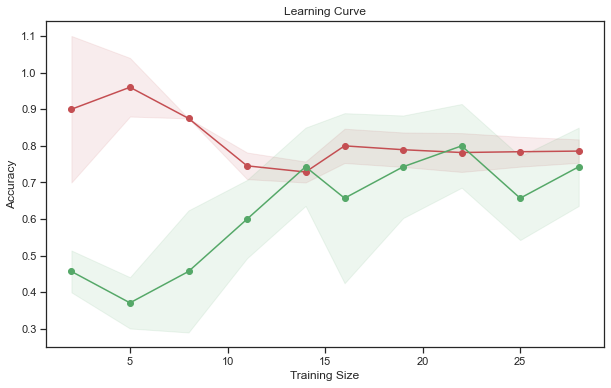

In [22]:
### **DECISION TREE LEARNING CURVE**

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the model
#clf = DecisionTreeClassifier(random_state=42)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')




### **LogisticRegression**

          5        54        56        68        69
0 -0.904337  0.834965  0.746252 -1.034831 -0.830778
1  1.903469  0.183068 -0.782040 -1.191149 -1.141964
2  0.569925  0.892579  0.763454 -0.601186 -0.323947
3  2.779154 -0.346131 -0.050556 -0.571475 -0.754571
4 -0.010887  1.339487  1.476908 -0.314883 -0.279858
          5        54        56        68        69
0 -0.904337  0.834965  0.746252 -1.034831 -0.830778
1  1.903469  0.183068 -0.782040 -1.191149 -1.141964
2  0.569925  0.892579  0.763454 -0.601186 -0.323947
3  2.779154 -0.346131 -0.050556 -0.571475 -0.754571
4 -0.010887  1.339487  1.476908 -0.314883 -0.279858
          5        54        56        68        69
0 -0.904337  0.834965  0.746252 -1.034831 -0.830778
1  1.903469  0.183068 -0.782040 -1.191149 -1.141964
2  0.569925  0.892579  0.763454 -0.601186 -0.323947
3  2.779154 -0.346131 -0.050556 -0.571475 -0.754571
4 -0.010887  1.339487  1.476908 -0.314883 -0.279858
           5        54        56        68        69
4  -0.01088

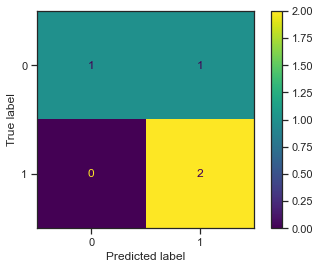

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
print(X.head())
print(Xscaled.head())

#X=dataKmeans
X=Xscaled

print(X.head())

targetVar=1

if targetVar==0:
    Y_group=data["group"] 
    targetnames=['Y','O']
    y=Y_group
if targetVar==1:
    Y_group=data["JND_group"] 
    targetnames=['0','1']   
    y=Y_group
if targetVar==2:
    Y_group=labels_CC
    targetnames=['0','1']   
    y=data["cluster"] 
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

clf.predict(X_test)
clf.predict_proba(X_test)
print(X_test)
print(y_test)
clf.predict(X_test)

#logreg = LogisticRegression(C=1e6, random_state=0).fit(X_train, y_train)
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [24]:
### **DECISION TREE LEARNING CURVE**


from sklearn.model_selection import learning_curve

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the model
#clf = DecisionTreeClassifier(random_state=42)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    logreg, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')

NameError: name 'logreg' is not defined

### **KNeighborsClassifier**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#print(Xscaled.head())
from sklearn.metrics import confusion_matrix

#X=dataKmeans
X=Xscaled

#print(data.head())

targetVar=1

if targetVar==0:
    y=data["group_Y"] 
    targetnames=['Y','O']

if targetVar==1:
    y=data["JND_group"] 
    targetnames=['0','1']   
if targetVar==2:
    y=data["cluster"] 
    targetnames=['0','1']   
    
cm=np.zeros((2,2))
knn_accuracy=[]
for iter in range(500):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=iter)
    
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn.score(X_test, y_test, sample_weight=None)
    knn_accuracy.append(accuracy_score(y_test, y_pred))
    cm=cm+confusion_matrix(y_test, y_pred)

np.mean(knn_accuracy)



0.5875

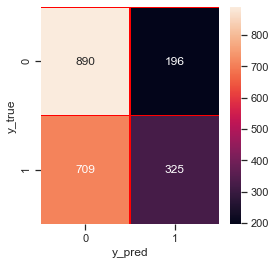

In [29]:

f, ax =plt.subplots(figsize = (4,4))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Mean Accuracy: 0.62
Standard Deviation of Accuracy: 0.23


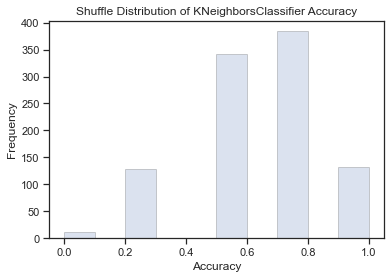

T-statistic: 17.1358
P-value: 0.0000
Mean Accuracy: 0.50
Standard Deviation of Accuracy: 0.22


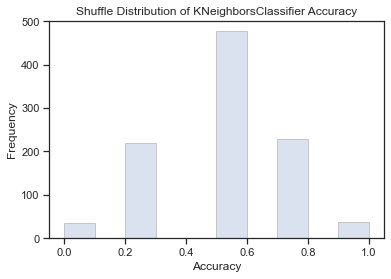

T-statistic: 0.4039
P-value: 0.3432


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a sample DataFrame




# Function to shuffle the dataset and evaluate the classifier
def evaluate_shuffled_data(X, y, n_neighbors, test_size, random_state,shuffle):

    if shuffle==1:
        random_state2=0
    elif shuffle==0:
        random_state2=random_state
    
    # Shuffle the dataset
    #X_shuffled, y_shuffled = X.sample(frac=1, random_state=random_state).values, y.sample(frac=1, random_state=0).values
    X_shuffled, y_shuffled = X.sample(frac=1, random_state=random_state).values, y.sample(frac=1, random_state=random_state2).values

    # Split the shuffled data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=test_size, random_state=42)

    # Create and train the KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy


accuracies_shuff = []
accuracies_real = []

for shuffle in [0,1]:
    
    # Number of shuffles to perform
    num_shuffles = 1000
    
    # List to store the accuracies
    accuracies = []

    
    # Perform the shuffling and evaluation process multiple times
    for i in range(1,num_shuffles):
        accuracy = evaluate_shuffled_data(X, y, n_neighbors=4, test_size=0.1, random_state=i,shuffle=shuffle)
        if shuffle==0:
            accuracies_real.append(accuracy)
        elif shuffle==1:
            accuracies_shuff.append(accuracy)
            
        accuracies.append(accuracy)

    # Convert the list of accuracies to a numpy array for analysis
    accuracies = np.array(accuracies)
    
    # Print the mean and standard deviation of the accuracies
    print(f'Mean Accuracy: {accuracies.mean():.2f}')
    print(f'Standard Deviation of Accuracy: {accuracies.std():.2f}')
    
    # Optionally, you can plot the distribution of accuracies
    
    plt.hist(accuracies,bins=10, edgecolor='k', alpha=0.2)
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.title('Shuffle Distribution of KNeighborsClassifier Accuracy')
    plt.show()
    
    from scipy.stats import ttest_1samp
    
    t_statistic, p_value = ttest_1samp(accuracies, 0.5,alternative='greater')
    print(f'T-statistic: {t_statistic:.4f}')
    print(f'P-value: {p_value:.4f}')